# Curvatures

In [1]:
import os
import numpy as np
from matplotlib import cm

In [2]:
from tinymesh import Mesh, hole_fill, denoise_normal_bilateral, denoise_normal_gaussian, denoise_l0_smooth
from viewer import Viewer

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "fandisk.ply")
mesh = Mesh(filename)

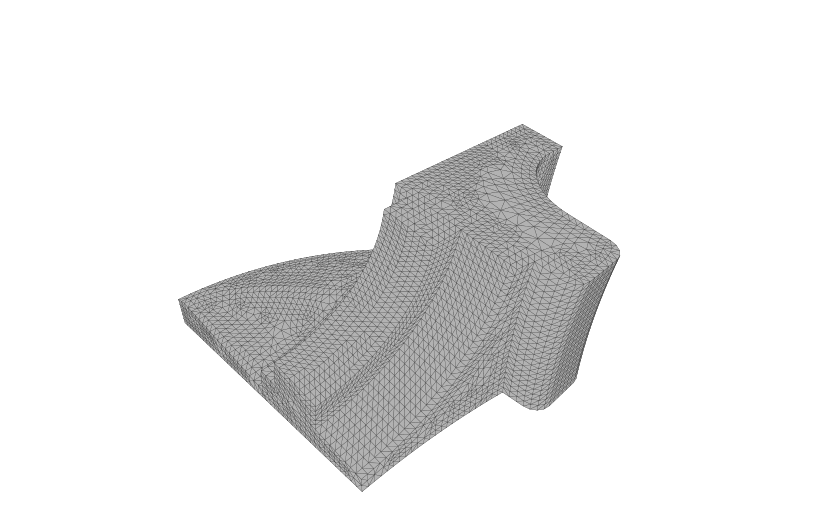

In [4]:
viewer = Viewer(800, 500)
viewer.lookat(5, 5, -5, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh)

In [5]:
nv = mesh.num_vertices()
Hs = np.zeros(nv)
Ks = np.zeros(nv)
for i in range(nv):
    v = mesh.vertex(i)
    Hs[i] = mesh.H(v)
    Ks[i] = mesh.K(v)

In [6]:
Hs = np.clip(Hs, -1.0, 1.0) * 0.5 + 0.5
Ks = np.clip(Ks, -1.0, 1.0) * 0.5 + 0.5

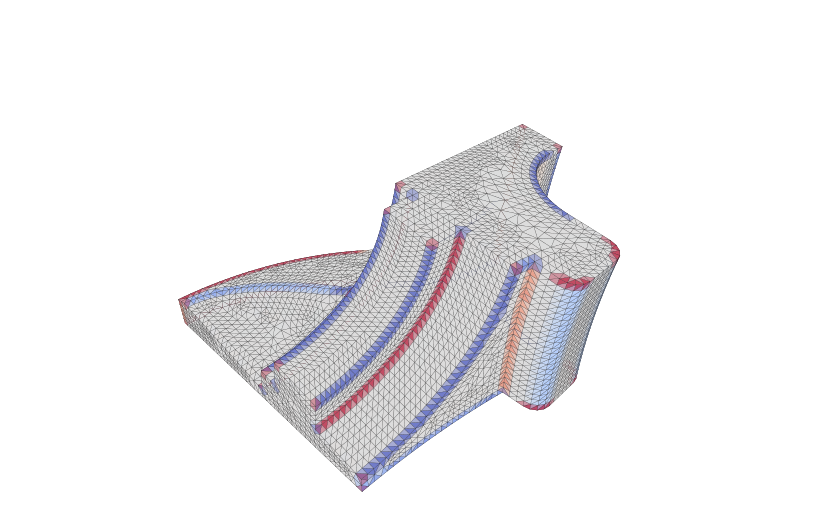

In [7]:
colorK = cm.coolwarm(Ks)
viewer.mesh_visualization(mesh, colors=colorK)

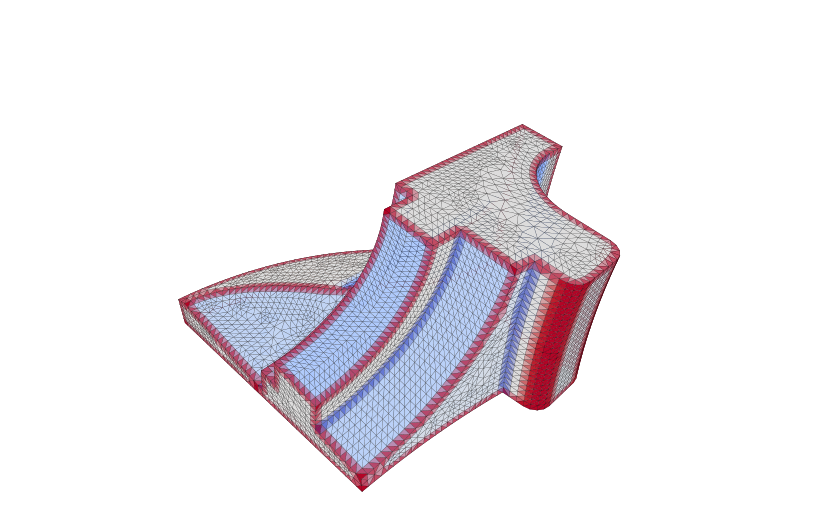

In [8]:
colorH = cm.coolwarm(Hs)
viewer.mesh_visualization(mesh, colors=colorH)